In [1]:
# Install required libraries
%pip install kagglehub


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\itcodes2\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### Importing libraries

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import shutil
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay




In [2]:
data_folder = './financial_data'
kaggle_data_path = kagglehub.dataset_download("ealaxi/paysim1")

for item in os.listdir(kaggle_data_path):
    shutil.move(os.path.join(kaggle_data_path, item), os.path.join(data_folder, item))

In [3]:
file_path = os.path.join(data_folder, 'PS_20174392719_1491204439457_log.csv')
data = pd.read_csv(file_path, nrows=5000)


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5000 non-null   int64  
 1   type            5000 non-null   object 
 2   amount          5000 non-null   float64
 3   nameOrig        5000 non-null   object 
 4   oldbalanceOrg   5000 non-null   float64
 5   newbalanceOrig  5000 non-null   float64
 6   nameDest        5000 non-null   object 
 7   oldbalanceDest  5000 non-null   float64
 8   newbalanceDest  5000 non-null   float64
 9   isFraud         5000 non-null   int64  
 10  isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB
None


In [5]:
data.tail(10)

step     type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
4990     5  CASH_IN  566903.96   C752090153     2893312.33      3460216.29   
4991     5  CASH_IN  201464.96  C1435836365     3460216.29      3661681.26   
4992     5  CASH_IN   16593.82   C890491412     3661681.26      3678275.07   
4993     5  CASH_IN   78588.13  C1966372954     3678275.07      3756863.21   
4994     5  CASH_IN  185680.98  C1186328673     3756863.21      3942544.19   
4995     5  CASH_IN   67017.13  C1000600589     3942544.19      4009561.32   
4996     5  CASH_IN  122744.28   C277549599     4009561.32      4132305.60   
4997     5  CASH_IN  414729.24  C1185631996     4132305.60      4547034.84   
4998     5  CASH_IN  328776.10   C804559024     4547034.84      4875810.94   
4999     5  CASH_IN   50535.87   C189993695     4875810.94      4926346.82   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
4990  C1782113663      1473468.42       906564.46        0               0  
4991  C1750563752       500147.76       298682.80        0               0  
4992  C1526298704        32092.07        15498.25        0               0  
4993  C1721246982       955069.95       876481.82        0               0  
4994   C985934102      1774746.94      1589065.96        0               0  
4995  C1163619825       118844.67        51827.53        0               0  
4996  C1850042097       207106.34        84362.06        0               0  
4997   C991505714      2109808.94      1695079.69        0               0  
4998   C977993101      1019467.84       962737.60        0               0  
4999   C187649742        70183.75        19647.88        0               0

In [6]:
(((data['isFraud'].value_counts())/len(data))*100).round(2)
data['isFraud'].value_counts()
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

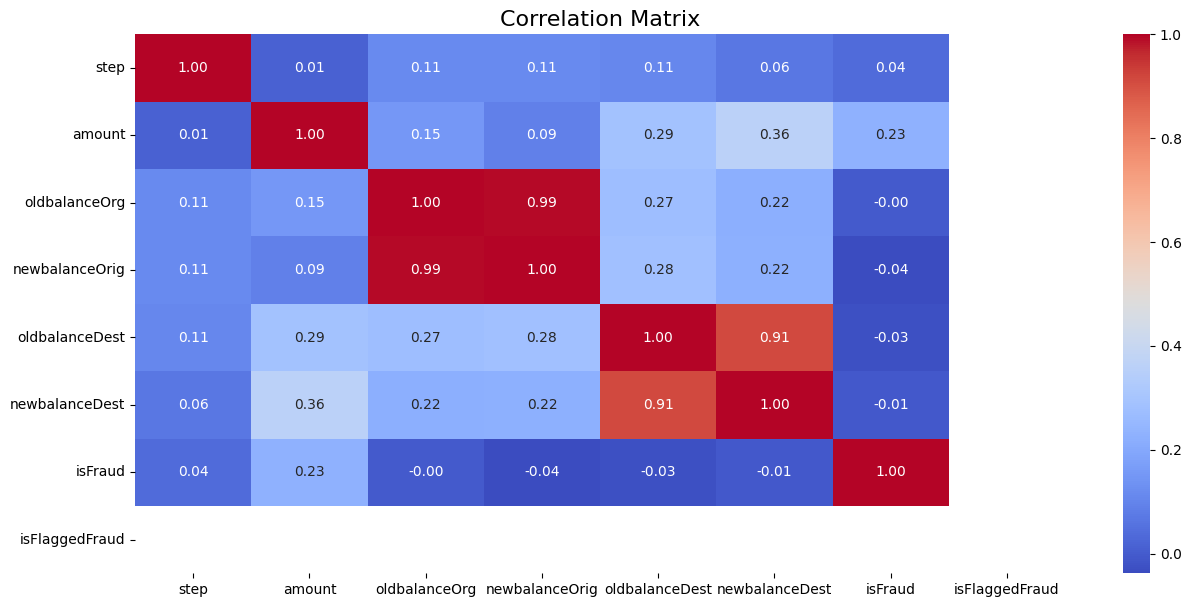

In [7]:
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [8]:
##Correlation within Target

numeric_data.corr()['isFraud'].sort_values(ascending=False)[1:]

amount            0.228089
step              0.035032
oldbalanceOrg    -0.004566
newbalanceDest   -0.008236
oldbalanceDest   -0.028902
newbalanceOrig   -0.037979
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

Fraud Distribution:
isFraud
0    4960
1      40
Name: count, dtype: int64


C:\Users\itcodes2\AppData\Local\Temp\ipykernel_896\3253612870.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  transaction_plot = sns.countplot(


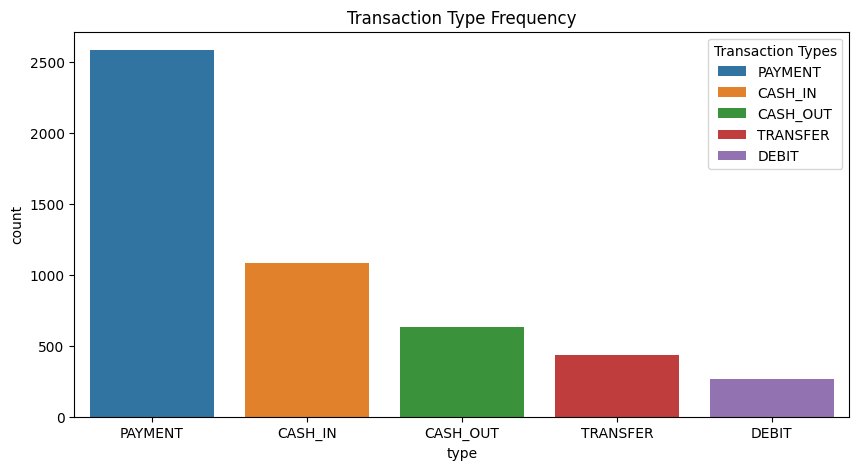

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [9]:
print("Fraud Distribution:")
print(data['isFraud'].value_counts())

# Define custom colors for each bar
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Add more colors as needed

# Visualize transaction types with custom colors
plt.figure(figsize=(10, 5))
transaction_plot = sns.countplot(
    data=data,
    x='type',
    order=data['type'].value_counts().index,
    palette=custom_colors[:len(data['type'].unique())]  # Use only as many colors as categories
)

# Add legend
legend_labels = data['type'].value_counts().index.tolist()  # Extract unique transaction types
for idx, bar in enumerate(transaction_plot.patches):
    bar.set_label(legend_labels[idx])

plt.legend(title='Transaction Types')
plt.title('Transaction Type Frequency')
plt.show()# Plot fraud amount distribution with unique customizations
plt.figure(figsize=(12, 6))




C:\Users\itcodes2\AppData\Local\Temp\ipykernel_896\502384651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


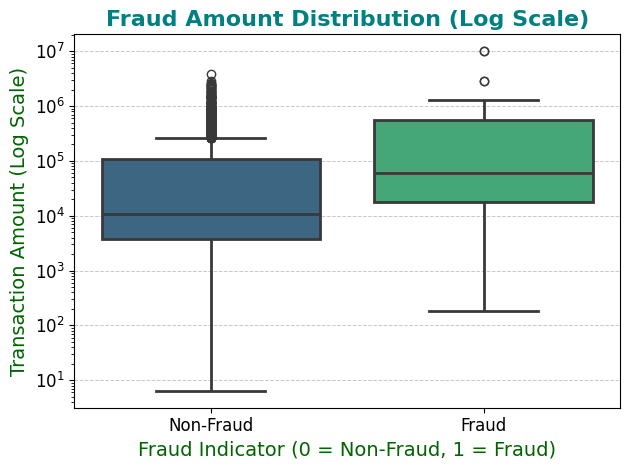

In [10]:
# Create a boxplot with enhanced styles
sns.boxplot(
    data=data, 
    x='isFraud', 
    y='amount', 
    palette='viridis',  # A distinct color palette
    linewidth=2  # Thicker lines for better visibility
)

# Log scale for the y-axis
plt.yscale('log')

# Customize the plot with distinct labels and styling
plt.title('Fraud Amount Distribution (Log Scale)', fontsize=16, fontweight='bold', color='teal')
plt.xlabel('Fraud Indicator (0 = Non-Fraud, 1 = Fraud)', fontsize=14, color='darkgreen')
plt.ylabel('Transaction Amount (Log Scale)', fontsize=14, color='darkgreen')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\itcodes2\AppData\Local\Temp\ipykernel_896\2795980474.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['amount'], data['balanceDifference']], labels=['Transaction Amount', 'Balance Difference'])


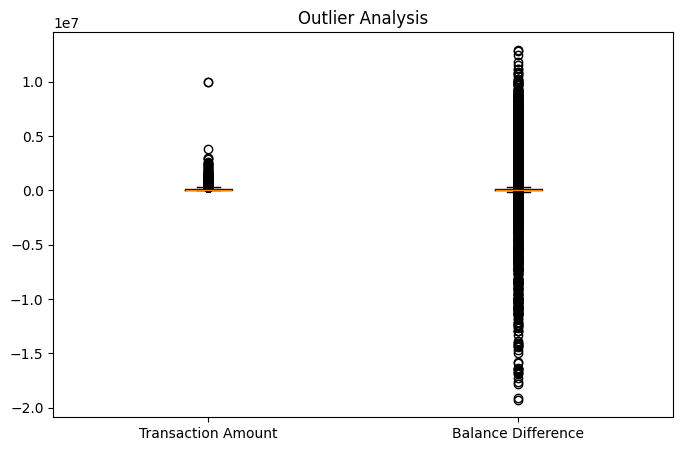

In [11]:
# Feature engineering
data['isFinancial'] = data['type'].apply(lambda x: 1 if x in ['PAYMENT', 'DEBIT'] else 0)
data['isTransfer'] = data['type'].apply(lambda x: 1 if x in ['CASH_OUT', 'TRANSFER'] else 0)
data['balanceDifference'] = data['oldbalanceOrg'] - data['oldbalanceDest']

# Check for anomalies
plt.figure(figsize=(8, 5))
plt.boxplot([data['amount'], data['balanceDifference']], labels=['Transaction Amount', 'Balance Difference'])
plt.title('Outlier Analysis')
plt.show()

In [12]:
# Remove extreme outliers
data = data[data['amount'] < 5_000_000]

# Prepare data for modeling
features = ['amount', 'isFinancial', 'isTransfer', 'balanceDifference']
X = data[features]
y = data['isFraud']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [14]:
# Train Gradient Boosting Classifier
#model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Model evaluation
y_pred = model.predict(X_test)

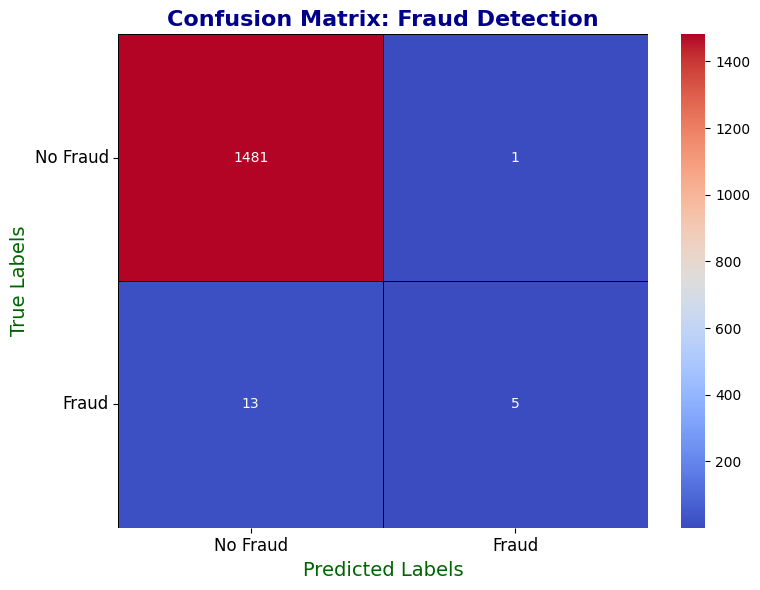

In [18]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Custom visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True,  # Annotate cells with values
    fmt='d',  # Integer formatting
    cmap='coolwarm',  # Unique color scheme
    linewidths=0.5,  # Add cell borders
    linecolor='black',  # Border color
    cbar=True  # Include color bar
)

# Add axis labels and title
plt.title('Confusion Matrix: Fraud Detection', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Predicted Labels', fontsize=14, color='darkgreen')
plt.ylabel('True Labels', fontsize=14, color='darkgreen')
plt.xticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'], fontsize=12, color='black')
plt.yticks(ticks=[0.5, 1.5], labels=['No Fraud', 'Fraud'], fontsize=12, color='black', rotation=0)

# Tight layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


In [19]:
# Classification report
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Feature importance analysis
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Model Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1482
           1       0.83      0.28      0.42        18

    accuracy                           0.99      1500
   macro avg       0.91      0.64      0.71      1500
weighted avg       0.99      0.99      0.99      1500

Feature Importance:
             Feature  Importance
0             amount    0.508582
3  balanceDifference    0.451847
2         isTransfer    0.035270
1        isFinancial    0.004301


C:\Users\itcodes2\AppData\Local\Temp\ipykernel_896\2598292663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


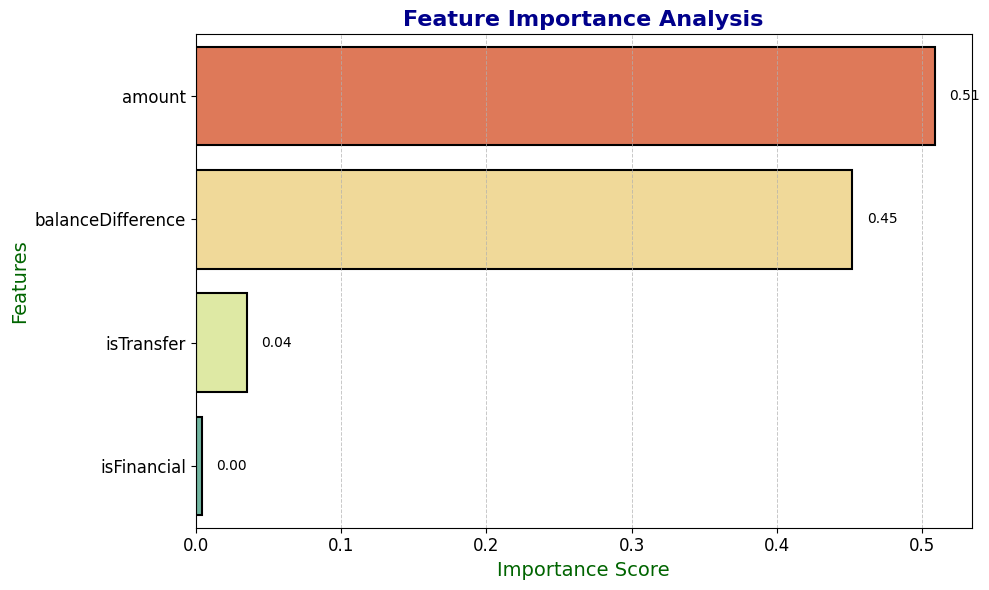

In [20]:
# Enhanced Feature Importance Plot
plt.figure(figsize=(10, 6))

# Customizing the barplot
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df, 
    palette='Spectral',  # Use a vibrant, gradient color palette
    edgecolor='black',  # Add borders around bars
    linewidth=1.5  # Thickness of the borders
)

# Adding data labels to the bars
for i, value in enumerate(feature_importance_df['Importance']):
    plt.text(
        value + 0.01,  # Slightly offset to the right of the bar
        i,  # Vertical position of the text
        f"{value:.2f}",  # Format the value with 2 decimals
        va='center',  # Center align vertically
        ha='left',  # Left align horizontally
        fontsize=10,  # Font size
        color='black'  # Text color
    )

# Customizing title and labels
plt.title('Feature Importance Analysis', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Importance Score', fontsize=14, color='darkgreen')
plt.ylabel('Features', fontsize=14, color='darkgreen')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Adding gridlines for clarity
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [21]:
# Model performance with varying estimators
estimators_range = range(1, 101)
training_accuracy = []
testing_accuracy = []

In [22]:
for n in estimators_range:
    temp_model = GradientBoostingClassifier(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
    temp_model.fit(X_train, y_train)
    training_accuracy.append(temp_model.score(X_train, y_train))
    testing_accuracy.append(temp_model.score(X_test, y_test))

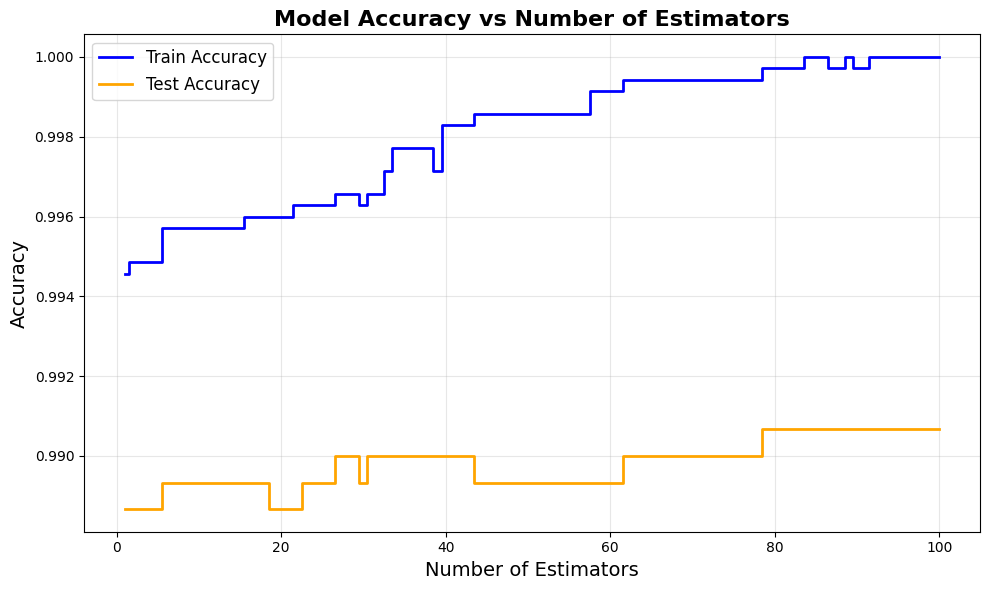

In [23]:
plt.figure(figsize=(10, 6))
plt.step(estimators_range, training_accuracy, label='Train Accuracy', color='blue', linewidth=2, where='mid')
plt.step(estimators_range, testing_accuracy, label='Test Accuracy', color='orange', linewidth=2, where='mid')
plt.xlabel('Number of Estimators', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy vs Number of Estimators', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Confusion Matrix To Csv

In [24]:
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted_No_Fraud', 'Predicted_Fraud'], 
                              index=['Actual_No_Fraud', 'Actual_Fraud'])

# Save to CSV
conf_matrix_df.to_csv('confusion_matrix.csv', index=True)


### Precision Recall to csv

In [25]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

# Create a DataFrame
pr_curve_df = pd.DataFrame({'Precision': precision[:-1],  # Exclude the last threshold-less value
                            'Recall': recall[:-1],
                            'Threshold': thresholds})

# Save to CSV
pr_curve_df.to_csv('precision_recall_curve.csv', index=False)
